In [1]:
## Libraries ##

#Data processing
import pandas as pd
import numpy as np
from mlxtend.preprocessing import minmax_scaling

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score





#Other
from scipy.stats import uniform

%matplotlib inline



In [2]:
##########################################################################################################
##########################################################################################################
##########################################################################################################
# Task 1: Exploratory Analysis and Data Munging

# In this task, you are being expected to clean data, treat missing values, find out related features and
# finally label the data.
# Every courier did not work every week. Thus, some of courier-week combinations’ data are not
# provided. First, come up with a way to treat these missing values. Removing missing values are not
# suggested since provided data set is small and it will affect your predictive model’s evaluation
# metric.
# Create a report / dashboard and correlation matrix, in addition to results of your univariate and
# bivariate analysis and explain your findings.
# Finally, label your data. If a specific courier’s week 9, 10 and 11 data is not provided, we label this
# courier as “1” otherwise “0”. After labeling, remove week 8(Yes including 8!), 9, 10 and 11 data to
# avoid bias in your next task. In addition, distribution of feature_3 is a hint how the data is generated.

##########################################################################################################
##########################################################################################################
##########################################################################################################

In [3]:
#####################################################################################################################
## Read the files ##

df_weekly = pd.read_csv("Courier_weekly_data.csv")
df_lifetime = pd.read_csv("Courier_lifetime_data.csv")
df_lifetime.columns = ["courier", "feature_a", "feature_b"]  ## We rename the lifetime variables feature_1 and feature_2 as feature_a and feature_b
#####################################################################################################################

In [4]:
#####################################################################################################################
## Explore the data structure##

print "Courier Weekly information size: ",df_weekly.shape
print "Courier Lifetime information size: ",df_lifetime.shape
print "\n"

print "Number of unique Couriers for weekly: ", df_weekly["courier"].nunique()
print "Number of unique Couriers for lifetime: ", df_lifetime["courier"].nunique()
print "\n"

display(df_weekly.head())
display(df_lifetime.head())

#For more information about the variables types we can use the commands below
# df_weekly.info()
# df_lifetime.info()
#####################################################################################################################

Courier Weekly information size:  (4117, 19)
Courier Lifetime information size:  (7524, 3)


Number of unique Couriers for weekly:  759
Number of unique Couriers for lifetime:  7524




,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
0,3767,2,6,34,38,0.0789,0.9211,140.4737,0.1316,2162.4737,0.7632,7.340776,8,20.208158,5.236316,0.8158,43.384804,1,19
1,3767,4,-1,42,37,0.0000,1.0000,135.5946,0.0811,2097.4054,0.9459,11.883784,19,18.855405,5.689459,0.8919,35.078042,3,11
2,3767,5,24,41,43,0.0233,0.9767,131.0930,0.0233,2043.8837,0.9302,7.072100,16,18.925116,5.138605,0.9302,31.455285,1,10
3,3767,6,-22,65,66,0.0606,0.9394,120.1515,0.0000,2124.2727,0.7727,7.356567,33,18.259697,4.704394,0.7879,34.252991,1,30
4,6282,2,9,33,27,0.0741,0.9259,100.0000,0.0370,4075.7407,0.8889,8.501233,5,26.863704,4.828519,0.8889,46.478114,1,4


,courier,feature_a,feature_b
0,208,a,25.0
1,218,c,0.0
2,225,c,NaN
3,231,c,0.0
4,242,c,NaN


In [5]:
#####################################################################################################################
## First variables distribution exploration ##
display(df_weekly.describe(include = "all"))
display(df_lifetime.describe(include = "all"))
#####################################################################################################################

,courier,week,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17
count,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.000000,4117.00000
mean,366530.934418,4.910857,-3.702453,44.232208,55.691037,0.068610,0.931390,104.331502,0.059339,3975.807328,0.767527,9.619359,20.266942,20.000994,5.211435,0.782381,68.655642,2.255526,12.78941
std,128603.611959,3.364852,17.407331,24.007116,31.666550,0.068999,0.068999,8.473348,0.064646,1237.055134,0.136458,1.827863,12.460020,3.205479,0.961980,0.164578,18.828885,1.542969,11.69108
min,3767.000000,0.000000,-138.000000,1.000000,1.000000,0.000000,0.000000,92.857100,0.000000,1136.750000,0.000000,2.575000,0.000000,5.416667,3.270000,0.000000,2.957809,1.000000,1.00000
25%,280239.000000,2.000000,-12.000000,26.000000,31.000000,0.018500,0.901200,100.000000,0.000000,2750.977800,0.693700,8.424751,11.000000,18.168824,4.570099,0.739100,57.839947,1.000000,5.00000
50%,406936.000000,5.000000,-2.000000,41.000000,51.000000,0.054100,0.945900,100.465100,0.043500,4099.425000,0.785700,9.497961,19.000000,19.648810,5.072500,0.822200,71.653595,2.000000,10.00000
75%,467727.000000,8.000000,6.000000,59.000000,76.000000,0.098800,0.981500,104.766000,0.088200,4774.028200,0.864200,10.607692,28.000000,21.335395,5.618522,0.883700,82.180556,3.000000,17.00000
max,519341.000000,11.000000,77.000000,169.000000,189.000000,1.000000,1.000000,197.739100,0.666700,12593.900000,1.000000,20.546667,86.000000,66.400000,12.546923,1.000000,180.861111,13.000000,195.00000


,courier,feature_a,feature_b
count,7524.000000,7524,6588.000000
unique,NaN,4,NaN
top,NaN,b,NaN
freq,NaN,4456,NaN
mean,518864.440324,NaN,26.373862
std,286880.574472,NaN,22.703621
min,208.000000,NaN,-61.000000
25%,275875.750000,NaN,20.000000
50%,529366.500000,NaN,25.000000
75%,803120.500000,NaN,32.000000


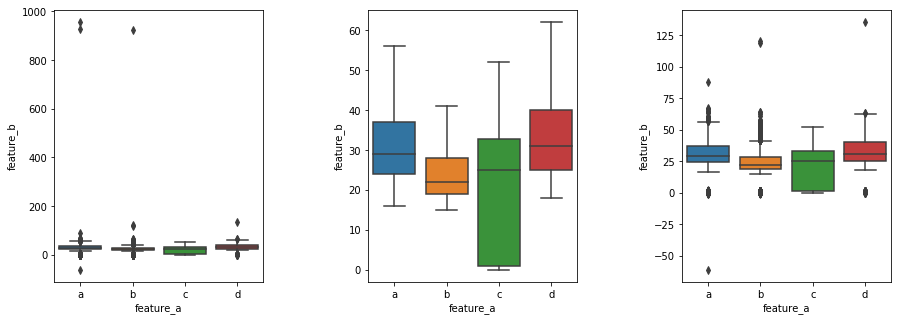

In [6]:
#####################################################################################################################
## Second variables distribution exploration ##

#First of all, we analize what is going on in the lifetime table.
#For this, we plot feature_b grouped by feature_a

fig, axs = plt.subplots(1,3, figsize=(15,5))
plt.subplots_adjust(wspace =0.5)

ax = sns.boxplot(x="feature_a", y="feature_b", data=df_lifetime, showfliers=True, ax=axs[0], order = ["a", "b", "c", "d"])

#To see the distribution without the outliers we can set the parameter showfliers =False
ax = sns.boxplot(x="feature_a", y="feature_b", data=df_lifetime, showfliers=False, ax=axs[1], order = ["a", "b", "c", "d"])

#We can't see the distribution really well in the first plot. We have found few outliers that should be modified. Every sample has outliers, 
# but these 3 outliers higher than 800 seem to be mistakes.
#So what can we do? In this case we could replace these outliers with the median of the sample. 
#But after further analysis, we see that these couriers are not in the df_weekly table. So we decide to drop them.
df_lifetime_out = df_lifetime[(df_lifetime["feature_b"]<800) | (df_lifetime["feature_b"].isnull()) ]

#We finally print the new lifetime table without the deleted outliers.
ax = sns.boxplot(x="feature_a", y="feature_b", data=df_lifetime_out, showfliers=True, ax=axs[2], order = ["a", "b", "c", "d"])

#For a further analysis with outliers we could use Z-Test or the IQR study.
#####################################################################################################################

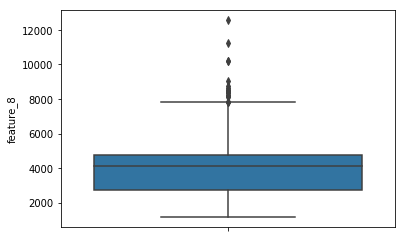

In [7]:
#####################################################################################################################
## Study of outliers for the weekly features ##
# We haven't studied the different variables one by one using boxplot, and we have not found any distribution with error-seem outliers.

#Here is an example of boxplot distribution for feature_8
ax = sns.boxplot(x="feature_8", data=df_weekly, showfliers=True, orient="v")   
#####################################################################################################################

In [8]:
#####################################################################################################################
## Searching for nulls ##
print "Number of nulls in the weekly data: ", df_weekly.isnull().sum()
print "Number of nulls in the lifetime data: ",df_lifetime_out.isnull().sum(), "\n"

#We find here that there are few nulls in our lifetime variable_b. We will try to find any relationship with other variables later using a correlation matrix.
#For now, we are going to study de distribution of this variable grouping by the only other lifetime variable, called feature_a.
print "#########################################################################################################"
print df_lifetime_out["feature_a"].value_counts()
print df_lifetime_out.groupby("feature_a").apply(lambda x: x.notnull().mean())

#As we can see the precentatge of nulls in the feature_b, for the feature_a ="c" is really high( only 35% of the values are not-null) and the number of observations is low (85).
#With more information we could try to find a better solution or approach to deal with this null values. In this case, the easiest way to deal with it is to replace the null
#values of the feature_b for the mean of every grouped feature_a. That is:
feature_a_mean = df_lifetime_out.groupby("feature_a")["feature_b"].mean()
df_lifetime_out["feature_b"] = np.where(df_lifetime_out["feature_b"].isnull(), feature_a_mean[df_lifetime_out["feature_a"]], df_lifetime_out["feature_b"])

#A possible solution would be to predict the value of feature_b using some other variables.
#####################################################################################################################

Number of nulls in the weekly data:  courier       0
week          0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
dtype: int64
Number of nulls in the lifetime data:  courier        0
feature_a      0
feature_b    936
dtype: int64 

#########################################################################################################
b    4455
a    2514
d     467
c      85
Name: feature_a, dtype: int64
           courier  feature_a  feature_b
feature_a                               
a              1.0        1.0   0.884248
b              1.0        1.0   0.876992
c              1.0        1.0   0.352941
d              1.0        1.0   0.910064


C:\Users\jordi\Miniconda2\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


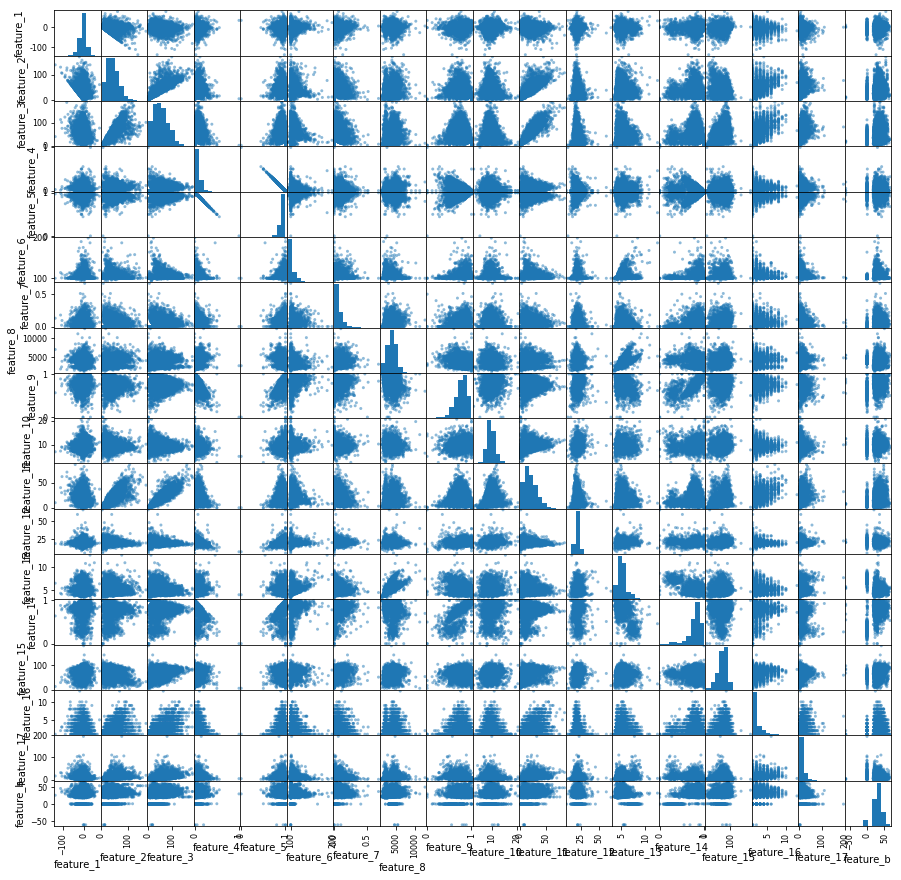

In [9]:
#####################################################################################################################
## Univariate-bivariate analysis ##
##We merge the dataframes using as the main table the weekly
df = df_weekly.merge(df_lifetime_out, how = "left")

#We define a "features" list in order to study the correlation between all the variables we want to check.
features = list("feature_"+str(n) for n in range(1,18))
features.extend(["feature_a","feature_b"])

df_features = df.loc[:,features]

#A general way to start studing the data is a scatter matrix of all the variables we want to check
pd.plotting.scatter_matrix(df_features,figsize=(15,15))
plt.show()

#If we analise the correlation visually, we can try to figure out some relationships.
#For example between feature 4 and 5. We can perceive a huge correlation which means that we can avoid the use of one of them in our model.
#We can also figure out a bit of relationship between feature_2 and feature_3. But we are not going to do this manually. For this, we create a correlation matrix

In [10]:
## Creation a correlation matrix ##
corr_matrix = df_features.corr('pearson')
corr_matrix

##We compare this matrix with values higher than 0.4 and the scatter matrix before.

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_b
feature_1,1.000000,-0.212915,-0.132828,-0.029416,0.029420,0.063833,0.056426,-0.008650,0.057826,0.062050,-0.100593,-0.004104,-0.013375,0.062439,0.124982,-0.091912,-0.139890,0.048386
feature_2,-0.212915,1.000000,0.788146,0.188848,-0.188848,0.039640,-0.003138,0.133437,-0.152309,-0.146601,0.749931,-0.183353,0.012738,0.010894,-0.162611,0.430875,0.396970,0.167732
feature_3,-0.132828,0.788146,1.000000,0.162444,-0.162446,0.062238,0.027473,0.068195,-0.103423,-0.173151,0.863150,-0.179758,-0.060513,0.063962,0.316081,0.505898,0.421079,0.221927
feature_4,-0.029416,0.188848,0.162444,1.000000,-1.000000,-0.073383,0.038013,0.227298,-0.636237,-0.175879,0.073725,-0.285753,0.115765,-0.454770,0.047795,0.032682,0.171434,0.063051
feature_5,0.029420,-0.188848,-0.162446,-1.000000,1.000000,0.073384,-0.038012,-0.227299,0.636239,0.175880,-0.073725,0.285752,-0.115766,0.454773,-0.047795,-0.032686,-0.171435,-0.063049
feature_6,0.063833,0.039640,0.062238,-0.073383,0.073384,1.000000,0.162079,-0.144915,0.148237,-0.016608,0.061017,0.019124,0.242932,0.129238,0.030601,0.031249,0.020535,0.026507
feature_7,0.056426,-0.003138,0.027473,0.038013,-0.038012,0.162079,1.000000,0.117473,0.001869,-0.002519,0.019583,-0.013856,-0.012018,0.096687,0.187241,0.097795,0.046569,0.136231
feature_8,-0.008650,0.133437,0.068195,0.227298,-0.227299,-0.144915,0.117473,1.000000,-0.199583,-0.075848,0.050960,0.022451,0.657388,-0.147889,0.151632,0.085589,0.075145,0.032066
feature_9,0.057826,-0.152309,-0.103423,-0.636237,0.636239,0.148237,0.001869,-0.199583,1.000000,0.094941,-0.046894,0.129074,-0.307862,0.758330,0.002539,-0.034584,-0.303134,0.213474
feature_10,0.062050,-0.146601,-0.173151,-0.175879,0.175880,-0.016608,-0.002519,-0.075848,0.094941,1.000000,0.159363,0.213882,0.017403,0.035227,0.097063,-0.066890,-0.098464,0.048353


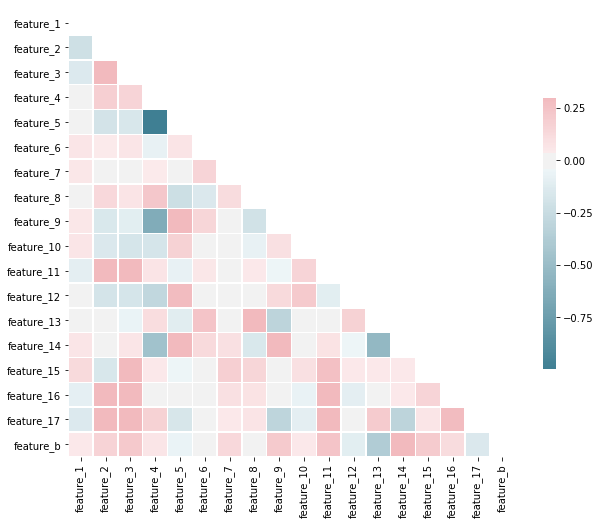

In [11]:
## Another way to visualize the correlation matrix ##
fig, ax = plt.subplots(figsize=(10,10))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

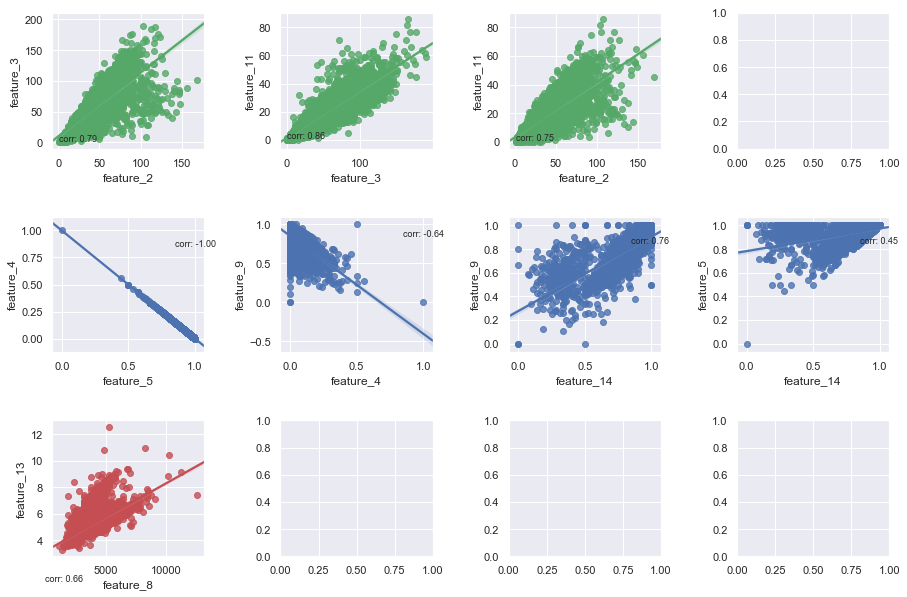

In [12]:
#And we found out some relations that shoud be studied in more detail:
#Correlation between features: 2, 3, 11 and  a smaller correlation with features 17, and 16
#Correlation between features: 4, 5, 9, 14
#Correlation between features: 8, 13 

sns.set(color_codes=True)
fig, axs = plt.subplots(3,4, figsize=(15,10))
plt.subplots_adjust(wspace =0.5, hspace = 0.5)

ax1 = sns.regplot(x='feature_2', y="feature_3", data =df_features, ax=axs[0,0], color = 'g')
ax1.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_2", "feature_3"], fontsize=9)

ax2 = sns.regplot(x='feature_3', y="feature_11", data =df_features, ax=axs[0,1],  color = 'g')
ax2.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_3", "feature_11"], fontsize=9)

ax3 = sns.regplot(x='feature_2', y="feature_11", data =df_features, ax=axs[0,2], color = 'g')
ax3.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_2", "feature_11"], fontsize=9)

ax4 = sns.regplot(x='feature_5', y="feature_4", data =df_features, ax=axs[1,0], color = 'b')
ax4.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_5", "feature_4"], fontsize=9)

ax5 = sns.regplot(x='feature_4', y="feature_9", data =df_features, ax=axs[1,1], color = 'b')
ax5.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_4", "feature_9"], fontsize=9)

ax6 = sns.regplot(x='feature_14', y="feature_9", data =df_features, ax=axs[1,2], color = 'b')
ax6.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_14", "feature_9"], fontsize=9)

ax7 = sns.regplot(x='feature_14', y="feature_5", data =df_features, ax=axs[1,3], color = 'b')
ax7.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_14", "feature_5"], fontsize=9)

ax8 = sns.regplot(x='feature_8', y="feature_13", data =df_features, ax=axs[2,0], color = 'r')
ax8.text(0.85, 0.85,'corr: %.2f' % corr_matrix.loc["feature_8", "feature_13"], fontsize=9)


plt.show()

## This means that in order to select some variables for the model, for every correlated pair, we will choose the one that the model defines as more important.

In [13]:
#####################################################################################################################
## Labeling ##
#As requested in the statement, we label our data.
df_labeled = df[['courier', 'week']]
df_labeled = df_labeled.groupby('courier').agg({'week':max})
df_labeled['label'] = df_labeled.apply(lambda row: row.week<9, axis=1)
df_labeled.drop('week', axis = 1, inplace =True)
df_labeled.head()
#####################################################################################################################


,label
courier,
3767,True
6282,False
10622,True
13096,False
14261,True


In [21]:
##########################################################################################################
##########################################################################################################
##########################################################################################################
# Task 2: Create a Predictive Algorithm

# In your second task, you were expected to create a logistic regression model that classifies your
# labels that done in the first task.
# Create a logistic regression model by using Python or R. You are free to choose your algorithm and
# libraries / packages to use.
# Finally, tune your hyper-parameters of your model by randomized search, grid search or any other
# search method and explain your reasoning for this choice.

##########################################################################################################
##########################################################################################################
##########################################################################################################

In [14]:
#####################################################################################################################
## We consider a creation of dummie variables using the feature_a. So now we will have 4 dummie variables (feature_a_a, feature_a_b, feature_a_c, feature_a_d) 
## instead of our variable feature_a
df_dumm = pd.get_dummies(data = df, columns = ["feature_a"])

#We also delate de weeks greater than 8
df_dumm = df_dumm[df_dumm["week"]<8]
## We define the complete set of variables that can be useful for the prediction.
df_courier = df_dumm.groupby('courier').agg({
                                    'week':["count",max, min],
                                    'feature_1':[min, max, "mean"] ,
                                    'feature_2':[min, max, "mean"] ,
                                    'feature_3':[min, max, "mean"] ,
                                    'feature_4':[min, max, "mean"] ,
                                    'feature_5':[min, max, "mean"] ,
                                    'feature_6':[min, max, "mean"] ,
                                    'feature_7':[min, max, "mean"] ,
                                    'feature_8':[min, max, "mean"] ,
                                    'feature_9':[min, max, "mean"] ,
                                    'feature_10':[min, max, "mean"] ,
                                    'feature_11':[min, max, "mean"] ,
                                    'feature_12':[min, max, "mean"] ,
                                    'feature_13':[min, max, "mean"] ,
                                    'feature_14':[min, max, "mean"] ,
                                    'feature_15':[min, max, "mean"] ,
                                    'feature_16':[min, max, "mean"] ,
                                    'feature_17':[min, max, "mean"] ,
                                    'feature_b':[min, max, "mean"],
                                    'feature_a_a':[max],
                                    'feature_a_b':[max],
                                    'feature_a_c':[max],
                                    'feature_a_d':[max],
                                        })

df_courier[df_labeled.columns] = df_labeled
#####################################################################################################################

In [15]:
features_selected = [
                    ("feature_1", "min"),
                     ("feature_1", "max"),
                     ("feature_1", "mean"),
#                      ("feature_2", "min"),
                     ("feature_2", "max"),
#                      ("feature_2", "mean"),
                     ("feature_3", "min"),
#                      ("feature_3", "max"),
                     ("feature_3", "mean"),
#                      ("feature_4", "min"),
#                      ("feature_4", "max"),
                     ("feature_4", "mean"),                
                     ("feature_5", "min"),
                     ("feature_5", "max"),
#                      ("feature_5", "mean"),
#                      ("feature_6", "min"),
#                      ("feature_6", "max"),
#                      ("feature_6", "mean"),
#                      ("feature_7", "min"),
                     ("feature_7", "max"),
#                      ("feature_7", "mean"),
#                      ("feature_8", "min"),
#                      ("feature_8", "max"),
#                      ("feature_8", "mean"),
#                      ("feature_9", "min"),
#                      ("feature_9", "max"),
#                      ("feature_9", "mean"),
#                      ("feature_10", "min"),
#                      ("feature_10", "max"),
                     ("feature_10", "mean"),
#                      ("feature_11", "min"),
#                      ("feature_11", "max"),
#                      ("feature_11", "mean"),
#                      ("feature_12", "min"),
                     ("feature_12", "max"),
#                      ("feature_12", "mean"),
                     ("feature_13", "min"),
                     ("feature_13", "max"),
#                      ("feature_13", "mean"),
#                      ("feature_14", "min"),
#                      ("feature_14", "max"),
#                      ("feature_14", "mean"),
                     ("feature_15", "min"),
#                      ("feature_15", "max"),
#                      ("feature_15", "mean"),
                     ("feature_16", "min"),
                     ("feature_16", "max"),
                     ("feature_16", "mean"),
                     ("feature_17", "min"),
                     ("feature_17", "max"),
#                      ("feature_17", "mean"),
#                      ("feature_b", "min"),
#                      ("feature_b", "max"),
#                      ("feature_b", "mean"),
                     
#                      ("feature_a_a", "max"),
#                      ("feature_a_b", "max"),
                     ("feature_a_c", "max"),
#                      ("feature_a_d", "max"),

                     ("week", "count"),
                      ("week", "min"),
                     ("week", "max")

                    ]
    
                     

In [16]:
#####################################################################################################################
#As a first aproximation, we use all the posible variables that we created before. Of course, this can result as an overfiting, knowing that that we have a sample of 350 true-false
#observations, and with a 70% for the training set, we could use max 25-30 variables (using the 10 observations to 1 variable rule). 
#After using Recursive Feature Elimination (check the next cell) and plot the feature importance over all the variables, we decide to select the 25 that the study
#show as most importants, those who give a better results and don't have an strong correlation between them.

X_pre = df_courier.drop('label', axis = 1)

#To try the different features that appear in the RFE
X_pre = X_pre.loc[:, features_selected]

X = minmax_scaling(X_pre, columns = list(X_pre.columns))
Y = df_courier['label']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)

# model = LogisticRegression( )
model = LogisticRegression(penalty = "l2",C =3.0835)

model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)
#####################################################################################################################

0.77625570776255703

In [25]:
# create the RFE model and select 25 attributes
rfe = RFE(model, 25)
rfe = rfe.fit(X_train,y_train)
# # summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X.loc[:,rfe.support_].head()

[False False False False False False  True False  True False False False
 False False False False False False False  True False False False  True
  True False  True False  True  True False  True False  True  True  True
  True  True  True False False False False  True  True  True  True  True
  True False False False  True False  True False False False False  True
  True]
[29 35 22  4 24 34  1 27  1  9 36 17 30 26 31 15 10 19 12  1 21 23  5  1  1
  2  1 28  1  1 16  1 32  1  1  1  1  1  1 25  6 33 11  1  1  1  1  1  1  8
 14 37  1 13  1  7 18 20  3  1  1]


feature_16           feature_12 feature_13 feature_8            \
               min      mean        max       mean       min      mean   
courier                                                                  
3767      0.000000  0.071429   0.181884   0.227402  0.061143  0.055042   
6282      0.000000  0.071429   0.299762   0.252706  0.178492  0.282223   
10622     0.142857  0.214286   0.255576   0.090787  0.105339  0.103715   
13096     0.142857  0.285714   0.155862   0.223960  0.314619  0.312272   
14261     0.000000  0.214286   0.260318   0.260022  0.177691  0.237740   

        feature_9           feature_2 feature_3     ...     feature_7  \
              max      mean       max       min     ...           max   
courier                                             ...                 
3767       0.9459  0.853000  0.380952  0.330275     ...      0.197390   
6282       0.9167  0.881117  0.303571  0.238532     ...      0.140693   
10622      0.7143  0.623800  0.511905  0.403670     ...      0.133343   
13096      0.7053  0.686000  0.375000  0.761468     ...      0.110544   
14261      0.9432  0.892537  0.488095  0.477064     ...      0.340933   

                  feature_4                   feature_5      week feature_b  \
             mean       min     max      mean       min       max       min   
courier                                                                       
3767     0.177018  0.000000  0.0789  0.091574    0.9211  0.857143  0.740157   
6282     0.190419  0.097294  0.1250  0.169910    0.8750  1.000000  0.755906   
10622    0.228623  0.259216  0.1270  0.267859    0.8730  0.142857  0.755906   
13096    0.128413  0.361176  0.1684  0.363595    0.8316  0.857143  0.755906   
14261    0.368812  0.000000  0.0377  0.041456    0.9623  1.000000  0.826772   

        feature_a_c feature_a_d  
                max         max  
courier                          
3767            0.0         0.0  
6282            0.0         0.0  
10622           0.0         0.0  
13096           0.0         0.0  
14261           0.0         0.0  

[5 rows x 25 columns]

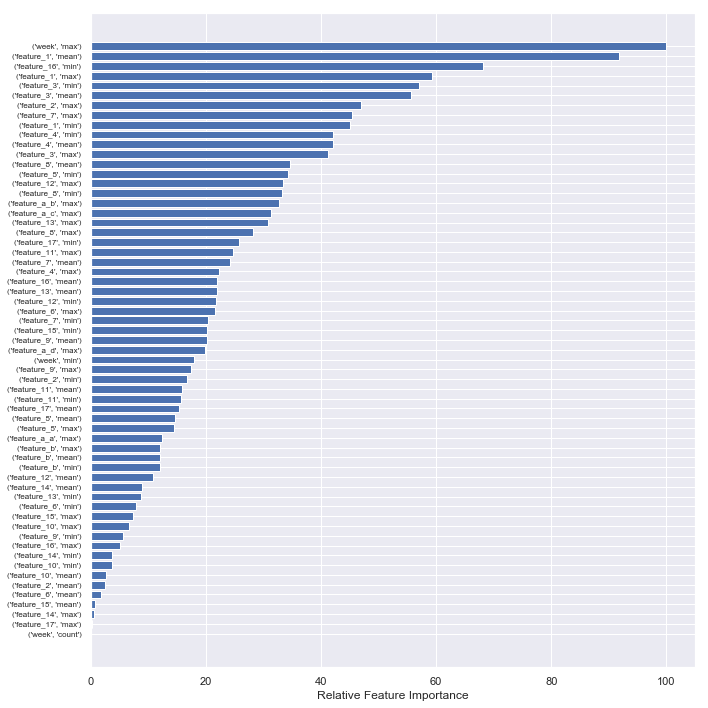

In [26]:
## Feture importance ##
feature_importance = abs(model.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
featfig = plt.figure( figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [17]:

# There use to be a set of parameters that give optimal results (in the optimization surface). With a huge space of possibilites, 
# the Randomized Search tend to be more efficient and yield better results faster finding one of the optimal results
# Overall, this will lead to faster, more efficient hyperparameter tunings in most situations. In this case, I found as better parameters : (C = 3.08353564201, penalty = l2)
#####################################################################################################################
## Tuning Parameters ## -- Grid Search


# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 20)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X, Y)

# View best hyperparameters
print 'Best Penalty:', best_model.best_estimator_.get_params()['penalty'] 
print 'Best C:', best_model.best_estimator_.get_params()['C']
print 'Best Score: ', best_model.best_score_ 

#####################################################################################################################

Best Penalty: l2
Best C: 11.2883789168
Best Score:  0.78463648834


In [18]:
#####################################################################################################################
## Tuning Parameters ## -- Randomized Search
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)


# Create randomized search 5-fold cross validation and 200 iterations
clf = RandomizedSearchCV(model, hyperparameters, random_state=1, n_iter=200, cv=5, verbose=0, n_jobs=-1)
# Fit grid search
best_model = clf.fit(X, Y)

# View best hyperparameters
print 'Best Penalty:', best_model.best_estimator_.get_params()['penalty'] 
print 'Best C:', best_model.best_estimator_.get_params()['C']
print 'Best Score: ', best_model.best_score_ 
#####################################################################################################################

Best Penalty: l2
Best C: 3.08353564201
Best Score:  0.781893004115


In [ ]:
##########################################################################################################
##########################################################################################################
##########################################################################################################
# Task 3: Evaluating the Model
    
# Choose an evaluation metric fitting to your model and explain why you have chosen this and share
# your scores for this metric.
##########################################################################################################
##########################################################################################################
##########################################################################################################

In [19]:
#####################################################################################################################
## sklearn metrics for accuracy ##
print "Accuracy:",metrics.accuracy_score(y_test, y_predict) 
print "Precision:",metrics.precision_score(y_test, y_predict)
print "Recall:",metrics.recall_score(y_test, y_predict), "\n"

## Classification report ##
print(classification_report(y_test, y_predict))

## Confusión matrix ##
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
print "Confusion Matrix:","\n", cnf_matrix, "\n"

## Cross Validation ##
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
print "Cross Validation accuracy: ", result.mean()

#####################################################################################################################

Accuracy: 0.776255707763
Precision: 0.75
Recall: 0.757575757576 

             precision    recall  f1-score   support

      False       0.80      0.79      0.79       120
       True       0.75      0.76      0.75        99

avg / total       0.78      0.78      0.78       219

Confusion Matrix: 
[[95 25]
 [24 75]] 

Cross Validation accuracy:  0.772290809328


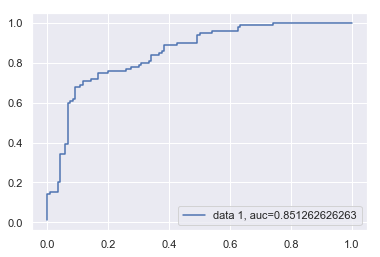

In [20]:
#####################################################################################################################
## auc ##
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
#####################################################################################################################